In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering, SpectralClustering

from luwiji.cluster import demo

In [4]:
x1, y1 = demo.blob_data()
x2, y2 = demo.moon_data()
x3, y3 = demo.circle_data()



(-10.985970037990379,
 6.596407079448438,
 -8.951342220000583,
 11.294642755849976)

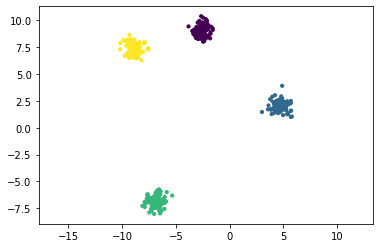

In [5]:
X = x1

plt.scatter(X[:, 0], X[:, 1], c=y1, s=10)
plt.axis('equal')

In [6]:
X

array([[ -9.47854243,   8.20092001],
       [ -3.81907018,   9.42523738],
       [ -8.96119929,   7.18716113],
       [  5.1274387 ,   1.89964099],
       [  4.92532409,   2.5409525 ],
       [ -2.90082427,   8.85325537],
       [ -2.27257881,   8.97787167],
       [ -8.57949825,   6.96065101],
       [ -2.46567409,   8.86478245],
       [  5.36545064,   2.4528051 ],
       [ -8.75289504,   7.23153125],
       [  4.1764136 ,   1.94340701],
       [ -7.89731551,   7.99623294],
       [  4.28222698,   2.31296856],
       [ -7.1234303 ,  -7.09638869],
       [ -6.85536638,  -7.29558465],
       [ -6.6291686 ,  -7.36888722],
       [ -2.56702176,   8.86373428],
       [  4.34519646,   2.39797073],
       [ -6.73473976,  -5.84240919],
       [  4.4039129 ,   2.51764498],
       [ -8.67526125,   6.69796613],
       [ -2.78138899,   9.06974742],
       [  3.01924517,   1.46097586],
       [ -2.60537811,   9.1650598 ],
       [ -9.23356498,   7.55925709],
       [ -6.67290974,  -5.94171169],
 

# Kmeans clustering

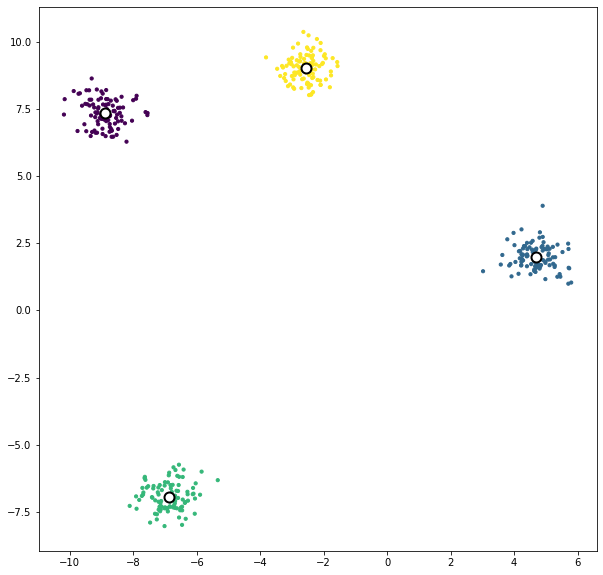

In [15]:
kMeans = KMeans(n_clusters=4)
kMeans.fit(X)
member = kMeans.fit_predict(X)
center = kMeans.cluster_centers_

plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], s=10, c=member)
plt.scatter(center[:, 0], center[:, 1], c='w', edgecolors='black', s=100, linewidths=2)

# kelemahan K-means

- kesulitan untuk menentukan K
  - solusi: elbow analysis, silhoute score, dll
- hanya untuk data yg bisa dirata2kan
  - solusi: K-modes, K-medoid, K-prototype, dll
- solusi belum selalu optimal
- hanya untuk data yang liniearly-separable

(-1.3171970998000415,
 2.3350401466063353,
 -0.797585897513993,
 1.2288794383599402)

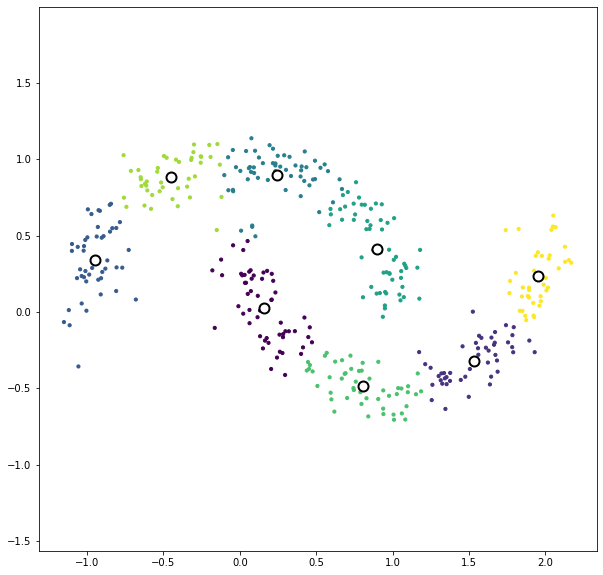

In [18]:
X = x2
kMeans = KMeans(n_clusters=8)
kMeans.fit(X)
member = kMeans.fit_predict(X)
center = kMeans.cluster_centers_

plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], s=10, c=member)
plt.scatter(center[:, 0], center[:, 1], c='w', edgecolors='black', s=100, linewidths=2)
plt.axis("equal")

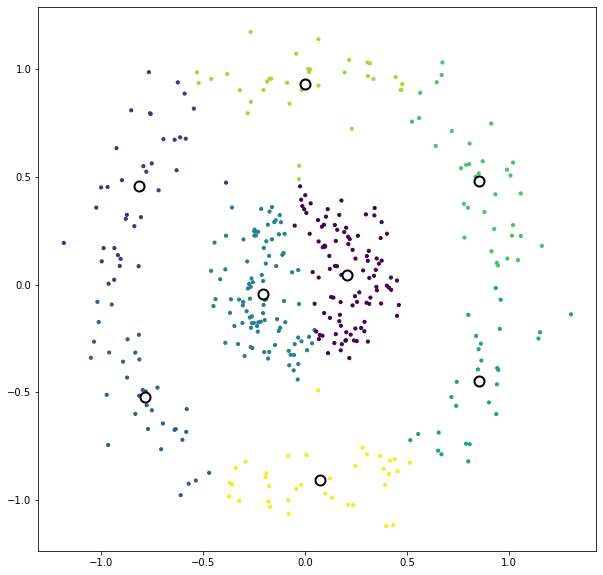

In [19]:
X = x3
kMeans = KMeans(n_clusters=8)
kMeans.fit(X)
member = kMeans.fit_predict(X)
center = kMeans.cluster_centers_

plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], s=10, c=member)
plt.scatter(center[:, 0], center[:, 1], c='w', edgecolors='black', s=100, linewidths=2)

Text(0.5, 0, 'n_cluster')

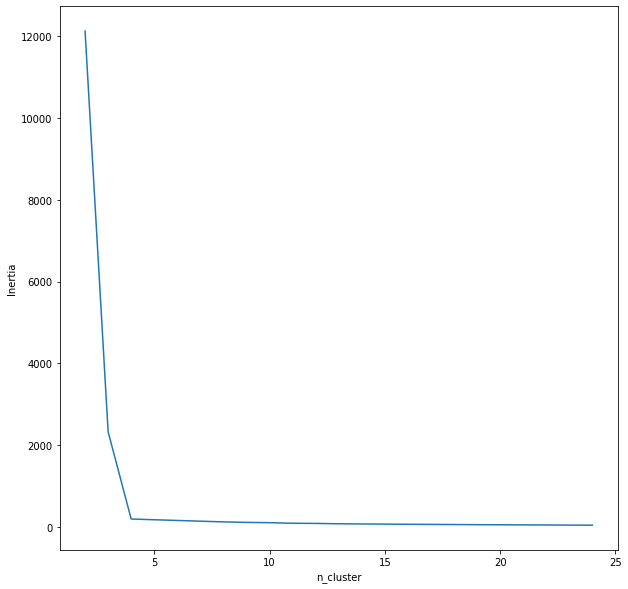

In [24]:
X = x1
score= []

for n in range (2, 25):
  kMeans = KMeans(n_clusters=n)
  kMeans.fit(X)
  member = kMeans.fit_predict(X)
  center = kMeans.cluster_centers_
  score.append(kMeans.inertia_)

plt.figure(figsize=(10, 10))
plt.plot(range(2, 25), score)
plt.ylabel("Inertia")
plt.xlabel("n_cluster")

diambil yang elbownya

scoring nya itu pake jarak dari center ke membernya
- Ddpr - member = sekecil mungkin
- Ddpr - dpr lain = sebesar mungkin

### cara menentukan K (n_clustering) dan ada label -> Silhouette score

In [27]:
from sklearn.metrics import silhouette_score

Text(0.5, 0, 'n_cluster')

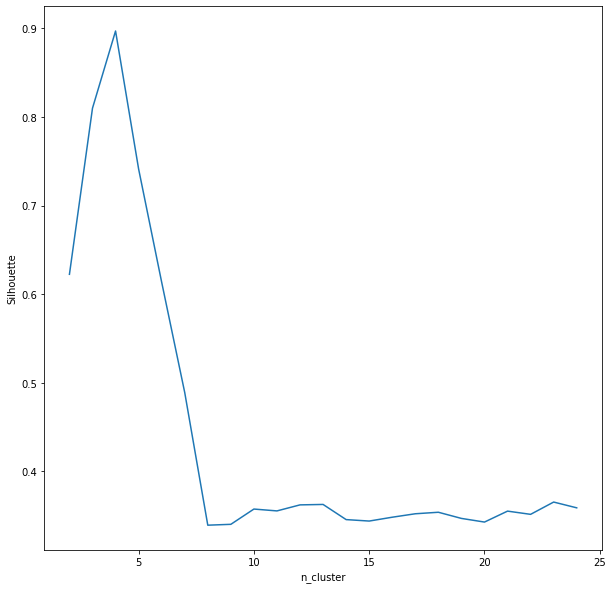

In [30]:
X = x1
score= []

for n in range (2, 25):
  kMeans = KMeans(n_clusters=n)
  kMeans.fit(X)
  member = kMeans.fit_predict(X)
  siluet = silhouette_score(X=X, labels=member, metric='euclidean')
  score.append(siluet)

plt.figure(figsize=(10, 10))
plt.plot(range(2, 25), score)
plt.ylabel("Silhouette")
plt.xlabel("n_cluster")

ini bisanya dipake kalo ada labelnya
dan diambil yang paling gede

# Beyond K-means

spectral clustering

(-1.3171970998000415,
 2.3350401466063353,
 -0.797585897513993,
 1.2288794383599402)

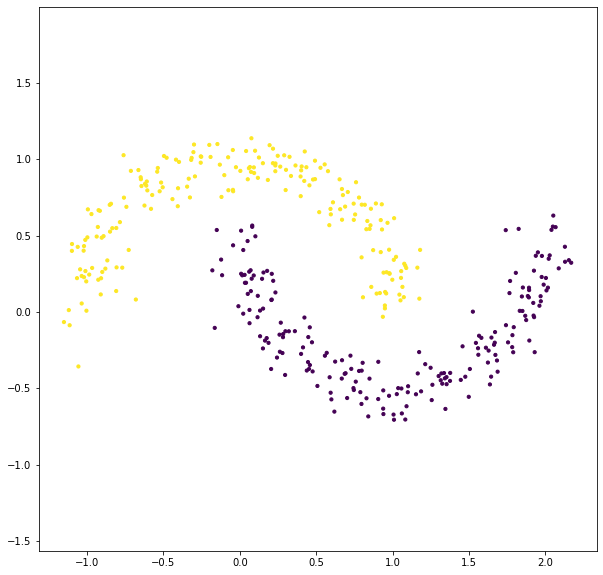

In [33]:
X = x2
sc = SpectralClustering(n_clusters=2, gamma=100)
label = sc.fit_predict(X)

plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=label, s=10)
plt.axis("equal")

(-1.3059922280383627,
 1.4294718296576319,
 -1.2377101572020435,
 1.2895239704739432)

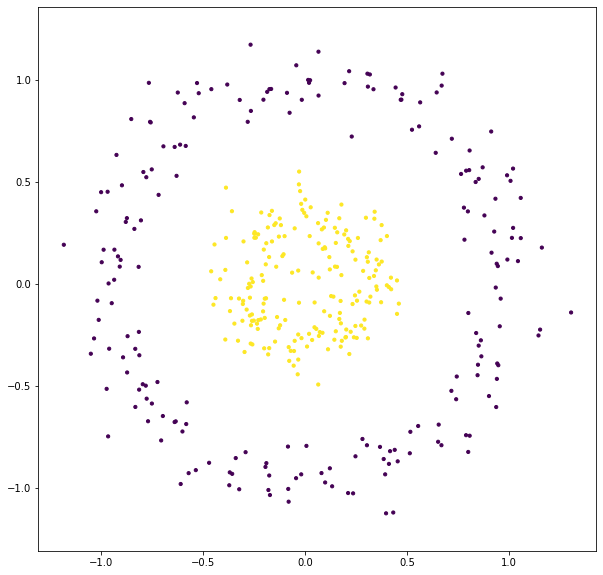

In [34]:
X = x3
sc = SpectralClustering(n_clusters=2, gamma=100)
label = sc.fit_predict(X)

plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=label, s=10)
plt.axis("equal")

# DBScan

(-1.3171970998000415,
 2.3350401466063353,
 -0.797585897513993,
 1.2288794383599402)

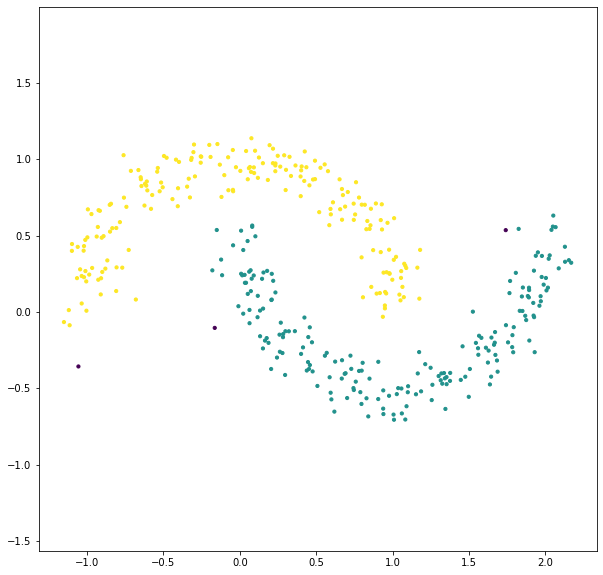

In [45]:
X = x2
dbscan = DBSCAN(eps=0.2)
label = dbscan.fit_predict(X)

plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=label, s=10)
plt.axis("equal")

(-1.3059922280383627,
 1.4294718296576319,
 -1.2377101572020435,
 1.2895239704739432)

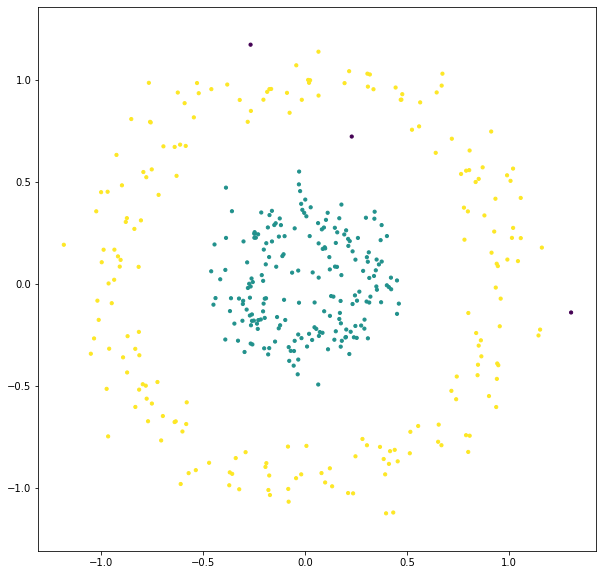

In [47]:
X = x3
dbscan = DBSCAN(eps=0.2)
label = dbscan.fit_predict(X)

plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=label, s=10)
plt.axis("equal")

# AHC

(-1.3171970998000415,
 2.3350401466063353,
 -0.797585897513993,
 1.2288794383599402)

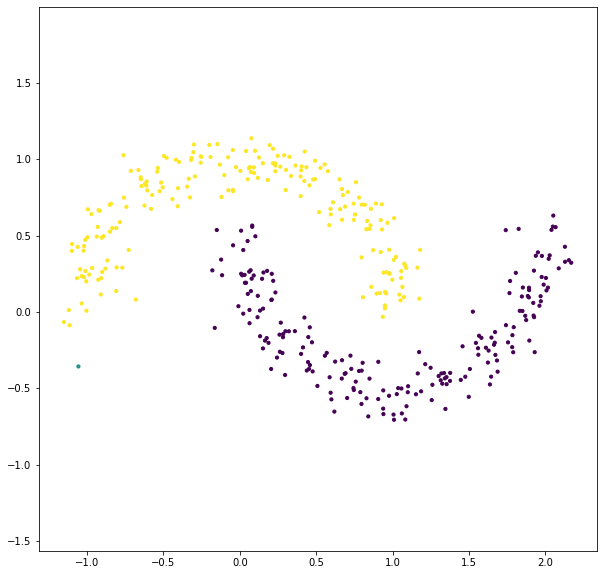

In [54]:
X = x2
AHC = AgglomerativeClustering(n_clusters=3, linkage="single")
label = AHC.fit_predict(X)

plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=label, s=10)
plt.axis("equal")

(-1.3059922280383627,
 1.4294718296576319,
 -1.2377101572020435,
 1.2895239704739432)

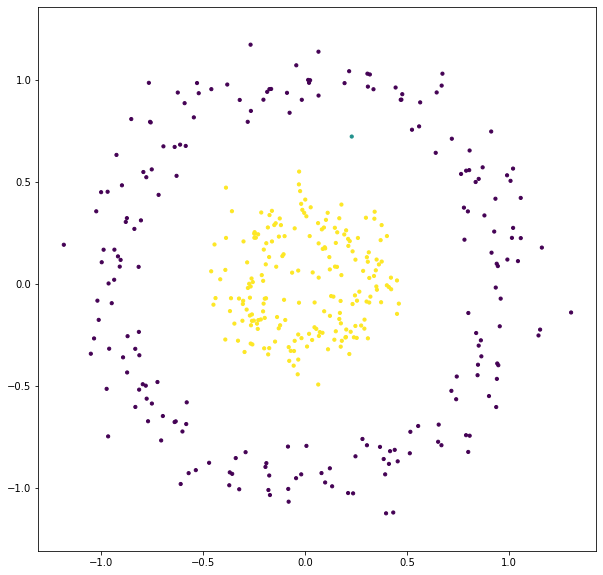

In [55]:
X = x3
AHC = AgglomerativeClustering(n_clusters=3, linkage="single")
label = AHC.fit_predict(X)

plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=label, s=10)
plt.axis("equal")

# scipy

In [56]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [57]:
X, y = demo.blob_data(30)

In [58]:
z = linkage(X)

## get membership

In [61]:
label = fcluster(z, 4, criterion="maxclust")
label

array([4, 1, 2, 2, 4, 4, 1, 1, 4, 1, 1, 1, 2, 2, 2, 1, 3, 2, 4, 3, 3, 3,
       3, 2, 2, 4, 3, 4, 4, 3], dtype=int32)

In [65]:
label = fcluster(z, 7, criterion="distance")
label

array([3, 1, 2, 2, 3, 3, 1, 1, 3, 1, 1, 1, 2, 2, 2, 1, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 3, 3, 3, 3, 3], dtype=int32)

# visualize dendogram

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [22.5, 22.5, 52.5, 52.5],
  [5.0, 5.0, 37.5, 37.5],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [92.5, 92.5, 123.75, 123.75],
  [75.0, 75.0, 108.125, 108.125],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [162.5, 162.5, 193.75, 193.75],
  [225.0, 225.0, 235.0, 235.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [265.0, 265.0, 282.5, 282.5],
  [255.0, 255.0, 273.75, 273.75],
  [245.0, 245.0, 264.375, 264.375],
  [230.0, 230.0, 254.6875, 254.6875],
  [178.125, 178.125, 242.34375, 242.34375],
  [91.5625, 91.5625, 210.234375, 210.234375],
  [21.25, 21.25, 150.8984375, 150.8984375]],
 'dcoord': [[0.0, 0.22383970602181488

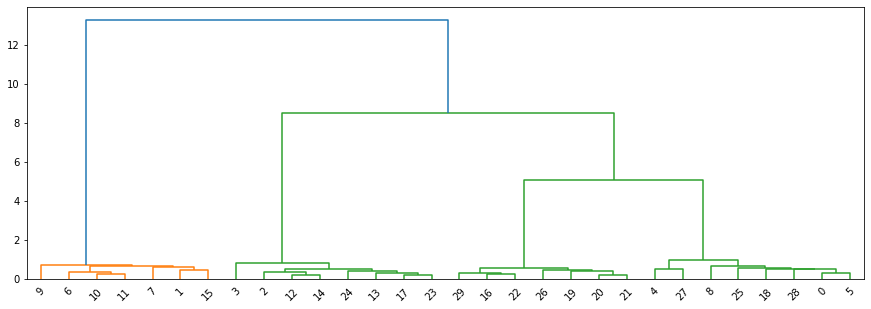

In [66]:
plt.figure(figsize=(15, 5))
dendrogram(z)